In [2]:
import nrrd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [7]:
sequence_globs = [
    # "ASL*exvivo*.nrrd",
    # "DWI*exvivo*.nrrd",
    # "T1*exvivo*.nrrd",
    "T2_*exvivo*.nrrd",
    "T2star*exvivo*.nrrd"
]

# DWI exploration and normalisation

In [5]:
seq_dir = Path("/Users/jgray/Documents/Code/mri_kidney_perfusion/data/processed/radiomics_format_sequences")

DWI_accumii = []

for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "dwi" in str(file).lower():
            data, header = nrrd.read(file)
            DWI_accumii.append(data)
DWI_accumii = np.array(DWI_accumii)

### Discriptive stats

In [ ]:
mean = DWI_accumii.mean()
std = DWI_accumii.std()

print(f"mean = {mean:.3f}, std = {std:.3f}")

### Value distribution
Low amount of values exceed above the 500 - 1000 bin.

In [ ]:
plt.hist(DWI_accumii.flatten())
plt.show()

### Clipping data 6 standard deviations above mean

In [ ]:
upper = mean + 6 * std
DWI_accumii = DWI_accumii.clip(max=upper)
maxi = DWI_accumii.max()
mini = DWI_accumii.min()

In [ ]:
print(f"min = {mini}, max = {maxi}")

### Scaling all files between 0 and 1

In [ ]:
for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "dwi" in str(file).lower():
            data, header = nrrd.read(file)
            data = data.clip(max=upper)
            data = data/maxi
            nrrd.write(str(file), data)

# ASL exploration and normalisation

In [ ]:
asl_accumii = []

for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "asl" in str(file).lower():
            data, header = nrrd.read(file)
            asl_accumii.append(data)
asl_accumii = np.array(asl_accumii)

### Discriptive stats

In [ ]:
mean = asl_accumii.mean()
std = asl_accumii.std()

print(f"mean = {mean:.3f}, std = {std:.3f}")

### Value distribution

In [ ]:
plt.hist(asl_accumii.flatten())
plt.show()

### Clipping data 6 standard deviations above mean

In [ ]:
upper = mean + 6 * std
asl_accumii = asl_accumii.clip(max=upper)
maxi = asl_accumii.max()
mini = asl_accumii.min()

In [ ]:
print(f"min = {mini}, max = {maxi}")

### Scaling all files between 0 and 1

In [ ]:
for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "asl" in str(file).lower():
            data, header = nrrd.read(file)
            data = data.clip(max=upper)
            data = data/maxi
            nrrd.write(str(file), data)

# T1 exploration and normalisation

In [ ]:
seq_dir = Path("/Users/jgray/Documents/Code/mri_kidney_perfusion/data/processed/radiomics_format_sequences")


t1_accumii = []

for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "t1" in str(file).lower():
            data, header = nrrd.read(file)
            t1_accumii.append(data)
t1_accumii = np.array(t1_accumii)

In [ ]:
mean = t1_accumii.mean()
std = t1_accumii.std()

print(f"mean = {mean:.3f}, std = {std:.3f}")

In [ ]:
plt.hist(t1_accumii.flatten())
plt.show()

In [ ]:
maxi = t1_accumii.max()
mini = t1_accumii.min()

In [ ]:
print(f"min = {mini}, max = {maxi}")

In [ ]:
for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "t1" in str(file).lower():
            data, header = nrrd.read(file)
            data = data.clip(max=upper)
            data = data/maxi
            nrrd.write(str(file), data)

# T2 Exploration and normalisation

In [12]:
t2_accumii = []

for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "t2_" in str(file).lower() and not "invivo" in str(file).lower():
            data, header = nrrd.read(file)
            # print(file, data.shape, sep='\n')
            t2_accumii.append(data)
t2_accumii = np.array(t2_accumii)

In [13]:
mean = t2_accumii.mean()
std = t2_accumii.std()

print(f"mean = {mean:.3f}, std = {std:.3f}")

mean = 123.746, std = 207.854


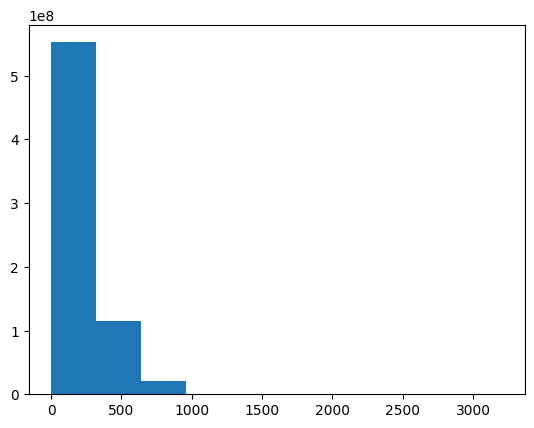

In [14]:
plt.hist(t2_accumii.flatten())
plt.show()

In [15]:
upper = mean + 6 * std
t2_accumii = t2_accumii.clip(max=upper)
maxi = t2_accumii.max()
mini = t2_accumii.min()

In [16]:
print(f"min = {mini}, max = {maxi}")

min = 0.0, max = 1370.871493827671


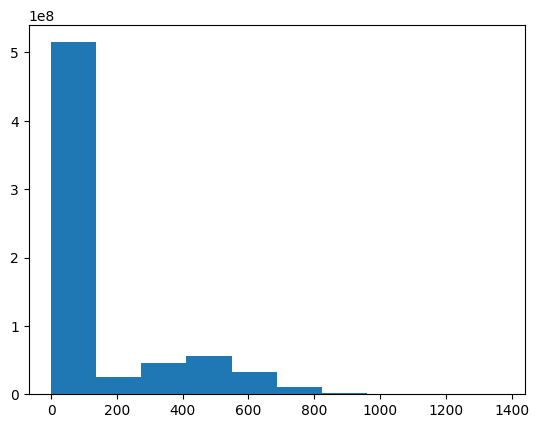

In [17]:
plt.hist(t2_accumii.flatten())
plt.show()

In [18]:
for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "t2_" in str(file).lower():
            data, header = nrrd.read(file)
            data = data.clip(max=upper)
            data = data/maxi
            nrrd.write(str(file), data)

# T2 star exploration and normalisation

In [19]:
del t2_accumii

In [20]:
t2star_accumii = []

for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "t2star" in str(file).lower() and not "invivo" in str(file).lower():
            data, header = nrrd.read(file)
            t2star_accumii.append(data)
t2star_accumii = np.array(t2star_accumii)

In [21]:
mean = t2star_accumii.mean()
std = t2star_accumii.std()

print(f"mean = {mean:.3f}, std = {std:.3f}")

mean = 113.588, std = 492.239


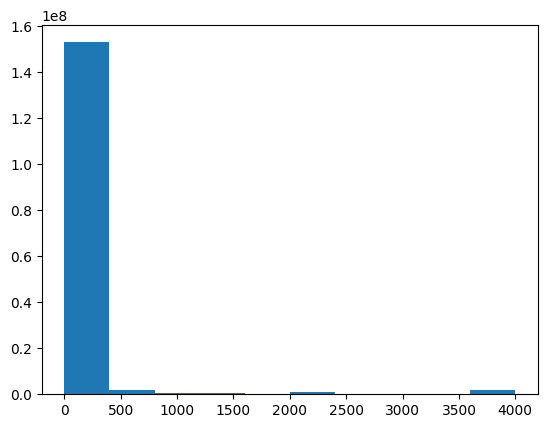

In [22]:
plt.hist(t2star_accumii.flatten())
plt.show()

In [23]:
t2star_accumii = t2star_accumii.clip(max=300)
maxi = t2star_accumii.max()
mini = t2star_accumii.min()

In [24]:
print(f"min = {mini}, max = {maxi}")

min = 0, max = 300


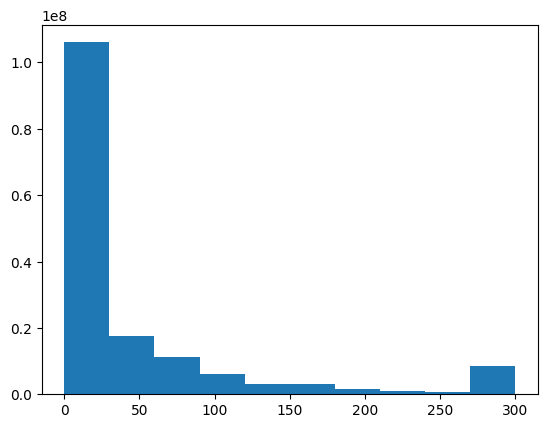

In [25]:
plt.hist(t2star_accumii.flatten())
plt.show()

In [26]:
for sequence in sequence_globs:
    files = list(seq_dir.glob(sequence))
    sequences = []
    for file in files:
        if "t2star" in str(file).lower():
            data, header = nrrd.read(file)
            data = data.clip(max=upper)
            data = data/maxi
            nrrd.write(str(file), data)